In [ ]:
# Hồi quy tuyến tính

# Mô tả mối quan hệ giữa biến độc lập (biến dự đoán) và biến phụ thuộc (biến kết quả) bằng một đường thẳng
# y = a*x + b
# thư viện: scikit-learn

# Thao tác
# 1. Tách dữ liệu thành train và test
  # train: huấn luyện mô hình
  # test: đánh giá kết quả
# 2. Xây mô hình
# 3. Đánh giá kết quả mô hình. Chỉ số nào?
  # Mean absolute error
  # Mean square error
  # Root mean square error

In [ ]:
# Chữa bài tập về nhà của trực quan hoá dữ liệu 1: Giá nhà Đống ĐA
# Vẽ biểu đồ so sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land).
# Vẽ biểu đồ thể hiện sự thay đổi giá nhà trung bình trên 1m2 theo số lượng phòng ngủ.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("house_price_Dống-Da_Hà-Nội_subdata.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


In [ ]:
df.describe()

,area,price,postDate,toilet,bedroom,floor,lat,long
count,665.000000,6.170000e+02,671.000000,240.000000,320.00000,366.000000,671.000000,671.000000
mean,103.763534,2.892758e+04,44259.903130,3.645833,4.31875,4.762295,21.015733,105.825550
std,471.861867,1.464474e+05,58.280392,2.349126,2.58976,1.676853,0.006517,0.009011
min,0.000000,4.500000e+00,44197.000000,1.000000,1.00000,1.000000,20.998499,105.795544
25%,39.000000,3.950000e+03,44197.000000,2.000000,3.00000,4.000000,21.011094,105.822605
50%,55.000000,8.900000e+03,44292.000000,4.000000,4.00000,5.000000,21.018072,105.828985
75%,80.000000,2.150000e+04,44312.000000,4.250000,6.00000,5.000000,21.018777,105.829949
max,11000.000000,3.300000e+06,44325.000000,16.000000,22.00000,11.000000,21.036845,105.841407


In [ ]:
# Tính giá nhà / m2

# Xử lý dữ liệu
  # khuyết thiếu dữ liệu
  # xử lý những dòng area = 0

In [ ]:
df = df.dropna(subset=['price', 'area'])

In [ ]:
df[df['area'] == 0]

In [ ]:
len(df[df['area'] == 0])

In [ ]:
df = df[df['area'] != 0]

In [ ]:
df.describe()

,area,price,postDate,toilet,bedroom,floor,lat,long
count,600.000000,6.000000e+02,600.000000,237.000000,316.000000,357.000000,600.000000,600.000000
mean,112.264583,2.961441e+04,44265.561667,3.632911,4.322785,4.753501,21.015420,105.825257
std,495.846912,1.484516e+05,57.529752,2.358777,2.594913,1.687951,0.006677,0.009205
min,14.000000,4.500000e+00,44197.000000,1.000000,1.000000,1.000000,20.998499,105.795544
25%,41.000000,4.200000e+03,44197.000000,2.000000,3.000000,4.000000,21.009739,105.821315
50%,55.000000,9.250000e+03,44306.000000,4.000000,4.000000,5.000000,21.017288,105.828030
75%,85.000000,2.192500e+04,44312.000000,4.000000,6.000000,5.000000,21.019019,105.829949
max,11000.000000,3.300000e+06,44325.000000,16.000000,22.000000,11.000000,21.036845,105.841407


In [ ]:
df['price/m2'] = df['price']/df['area']
df.describe()

,area,price,postDate,toilet,bedroom,floor,lat,long,price/m2
count,600.000000,6.000000e+02,600.000000,237.000000,316.000000,357.000000,600.000000,600.000000,600.000000
mean,112.264583,2.961441e+04,44265.561667,3.632911,4.322785,4.753501,21.015420,105.825257,221.522396
std,495.846912,1.484516e+05,57.529752,2.358777,2.594913,1.687951,0.006677,0.009205,385.254899
min,14.000000,4.500000e+00,44197.000000,1.000000,1.000000,1.000000,20.998499,105.795544,0.122500
25%,41.000000,4.200000e+03,44197.000000,2.000000,3.000000,4.000000,21.009739,105.821315,100.000000
50%,55.000000,9.250000e+03,44306.000000,4.000000,4.000000,5.000000,21.017288,105.828030,169.090909
75%,85.000000,2.192500e+04,44312.000000,4.000000,6.000000,5.000000,21.019019,105.829949,283.149510
max,11000.000000,3.300000e+06,44325.000000,16.000000,22.000000,11.000000,21.036845,105.841407,8333.333333


<BarContainer object of 2 artists>

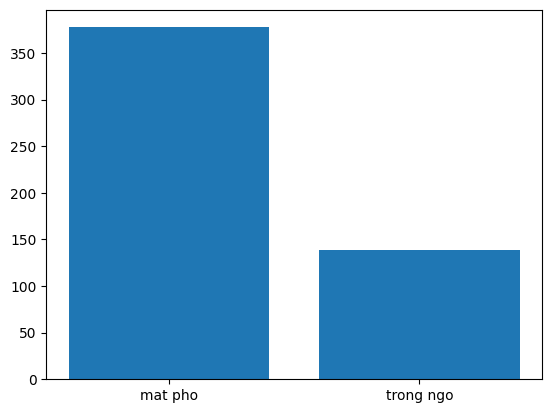

In [ ]:
# Vẽ biểu đồ so sánh giá nhà TRUNG BÌNH trên 1 m2 giữa các hình thức nhà (type_of_land).
df1 = df.groupby('property_type')['price/m2'].mean().reset_index()
# Vẽ
plt.bar(df1['property_type'], df1['price/m2'])

<BarContainer object of 14 artists>

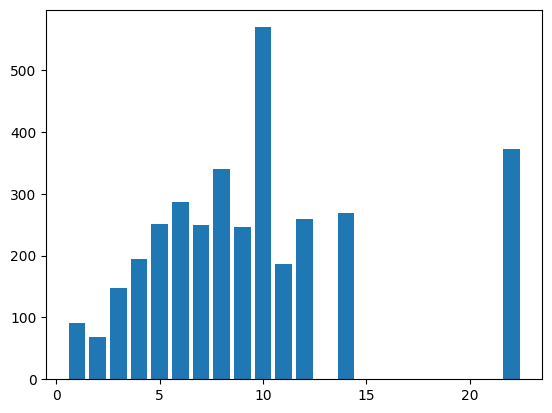

In [ ]:
# Vẽ biểu đồ thể hiện sự thay đổi giá nhà trung bình trên 1m2 theo số lượng phòng ngủ.
df2 = df.groupby('bedroom')['price/m2'].mean().reset_index()
plt.bar(df2['bedroom'], df2['price/m2'])

# Thực hành: Xây dựng mô hình hồi quy tuyến tính

### [Bài tập] Xây dựng mô hình hồi quy tuyến tính dự đoán chi phí y tế cá nhân

In [ ]:
df = pd.read_csv("insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Vẽ biểu đồ để trực quan hóa mối quan hệ giữa tuổi của người được bảo hiểm (age) với chi phí y tế (charges);
# và mối quan hệ giữa chỉ số trọng lượng cơ thể (bmi) với chi phí y tế (charges).

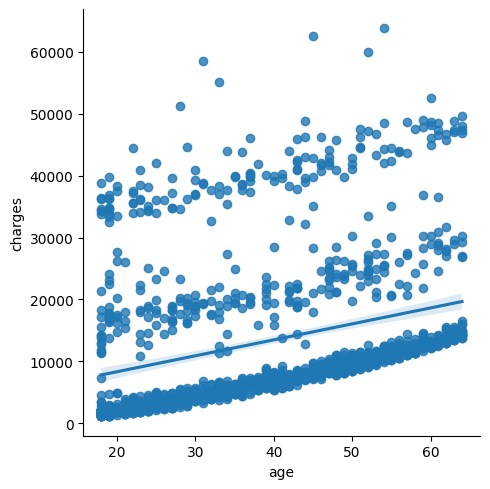

In [ ]:
sns.lmplot(x='age', y='charges', data=df)

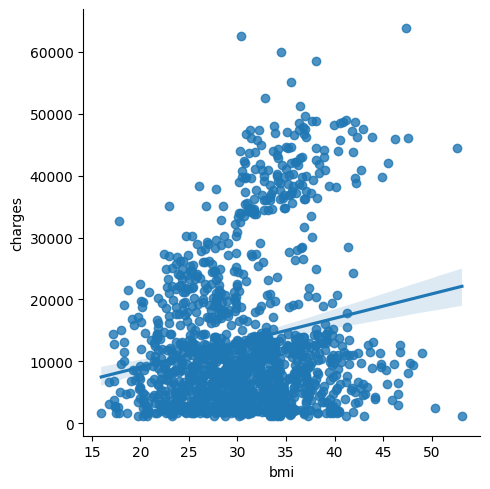

In [ ]:
sns.lmplot(x='bmi', y='charges', data=df)

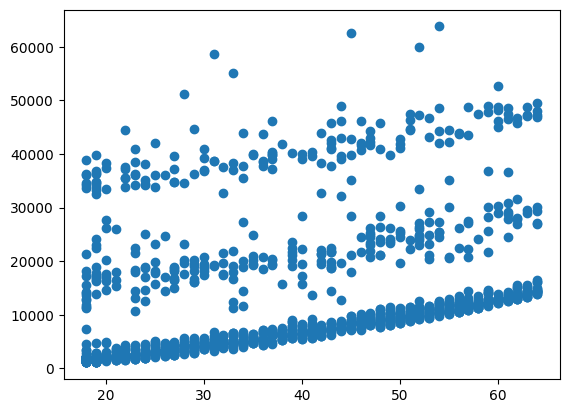

In [ ]:
plt.scatter(df['age'], df['charges'])

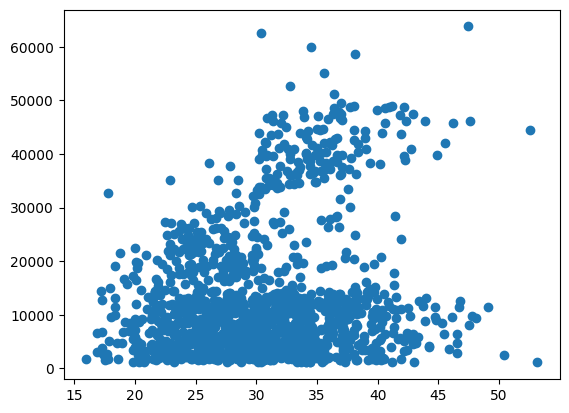

In [ ]:
plt.scatter(df['bmi'], df['charges'])

In [ ]:
# Chuyển các biến có kiểu categorical: sex, smoker, region thành các biến “Dummy”:
  # sex_female , sex_male, smoker_no, smoker_yes, region_northeast  region_northwest region_southeast, region_southwest.
# Sau đó loại bớt 2 trường không cần thiết:  sex_male, smoker_no.

In [ ]:
pd.get_dummies(df[['sex', 'smoker', 'region']]).astype(int)

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [ ]:
dummy = pd.get_dummies(df[['sex', 'smoker', 'region']])
dummy.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0


In [ ]:
df = pd.concat([df, dummy], axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
df = df.drop(['sex_male', 'smoker_no', 'sex', 'smoker', 'region'], axis=1)
df.head()

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,1,0,0,0,1
1,18,33.770,1,1725.55230,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,0,1,0,0


In [ ]:
# Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra.
from sklearn.model_selection import train_test_split
X = df.drop(['charges'], axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 102)

In [ ]:
# Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là chi phí y tế, các biến đầu vào là các trường còn lại.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.coef_

array([  250.85690503,   346.49696428,   390.56737662,   363.8678243 ,
       24122.70104706,   418.31569742,   141.23304398,  -493.90853388,
         -65.64020752])

In [ ]:
lr.intercept_

-12677.773303233029

In [ ]:
# Đánh giá mô hình.
from sklearn import metrics
y_pred = lr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4312.28206265876
Mean Squared Error: 38400295.99916715
Root Mean Squared Error: 6196.797237215944


In [ ]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [ ]:
from sklearn.metrics import r2_score
score= r2_score(y_test,y_pred)
score

0.7244232876221379

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# biến X (biến dự đoán) có thể giải thích được cho 72.44% sự thay đổi của biến y (biến phụ thuộc)
# Các biến tuổi, giới tính, bmi, số lượng con cái, có hút thuốc hay không, địa điểm ở đâu có thể giải thích
# được cho 72.44% sự thay đổi của chi phí.